In [1]:
# prompt: mount the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Course-end Project 1 : Facial Recognition

### **Problem Statement**
Perform Facial Recognition with Deep Learning in Keras Using CNN

<br/>

#### **Description**

**Objective:** Create a facial recognition tool using a relevant deep learning algorithm, leveraging the provided resources.

<br/>


**Context:**

You are working for Face2Gene, an American AI company that has developed a healthcare app for doctors. The app utilizes deep learning algorithms to aid in diagnosing patients for genetic disorders and their variants. It converts patient photos into de-identified mathematical facial descriptors, which are then compared to syndrome-specific computational-based classifiers to determine similarity. The app provides a prioritized list of syndromes with similar morphology and suggests phenotypic traits and genes for feature annotation and syndrome prioritization.

Management has given priority to empowering and entrusting the in-house AI team. As a new member of the team, your task is to build a baseline model for facial recognition. The goal is to further enhance the app's existing features and add more value to the business based on this baseline model.

<br/>

**Dataset Details:**

The ORL Database of Faces consists of 400 images from 40 different subjects. The images were captured at different times, under varying lighting conditions, with different facial expressions (open, closed eyes, smiling, not smiling), and with or without glasses. All the images have a dark homogeneous background, and the subjects are positioned upright and frontal with some tolerance for side movement. Each image has a size of 92x112 pixels and 256 grey levels per pixel.

Download Data:
https://www.kaggle.com/datasets/kasikrit/att-database-of-faces

<br/>

**Steps to be followed:**

The following steps will guide you in building the model.

1. Import the relevant packages and collect all the necessary dependencies.

2. Upload and import the data.

3. View a few images to get a sense of the data.

4. Create a validation framework and split the data into train, test, and validation datasets.

5. Perform necessary transformations to prepare the data for input to the CNN model.

6. Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully connected layer. You can also consider utilizing state-of-the-art architectures using transfer learning.

7. Train the model using the prepared data.

8. Plot the results to evaluate the model's performance.

9. Iterate on the model, making adjustments and improvements, until you achieve an accuracy above 90%.



### 1. Import required Packages

In [2]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [3]:
# Import keras packages
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

import tensorflow as tf
import itertools

In [4]:
from IPython.display import display
from PIL import Image

#### 2. Upload and import the data

In [50]:
# Copy of parent folder of images
path = "/content/drive/MyDrive/AI/Computer Vision/My Notes/Course End Project/Face Recognition/archive"

Load data in proper format (2d image format (numpy array))

In [60]:
# create function
def prepare_data(path):

    X = np.zeros(shape=(10304, ), dtype= np.int8)
    y = np.array([])

    # Loop to read data
    for i in range(1,41):
        for j in range(1,11):
            img = Image.open(f'{path}/s{i}/{j}.pgm')
            data = np.asarray(img).reshape(-1)
            X = np.vstack((X,data))
            y = np.append(y,i-1) # -1 : because to start label from 0

    y = y.astype('int8')
    X = X[1:]

    # Reshape data (convert to 2d)
    X = X.reshape(-1,112,92)

    return X,y

# Get data
X, y = prepare_data(path)
data = [X, y]

In [61]:
data[0].shape

(400, 112, 92)

In [62]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int8)

#### 3. View a few images to get a sense of the data.

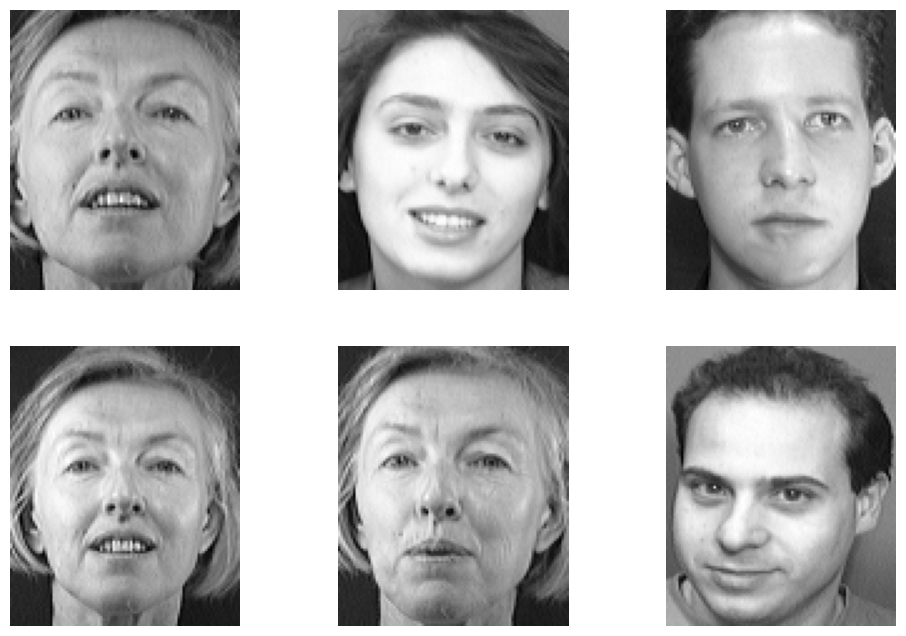

In [63]:
# See some sample from data
sample = data[0][np.random.choice(data[0].shape[0],
                                size=6,
                                replace=False),:]

# Plotting images
plt.figure(figsize=(12,8))
i=0
for s in sample:
    ax = plt.subplot(2, 3, i+1)
    plt.imshow(s,cmap='gray')
    plt.axis('off')
    i+=1

In [64]:
# normalize every image
X = np.array(X,dtype='float32')/255
X[0]

array([[0.1882353 , 0.19215687, 0.1764706 , ..., 0.21960784, 0.21960784,
        0.21176471],
       [0.1764706 , 0.20392157, 0.15294118, ..., 0.20392157, 0.19607843,
        0.2       ],
       [0.1764706 , 0.19607843, 0.16470589, ..., 0.1882353 , 0.20784314,
        0.19607843],
       ...,
       [0.19607843, 0.1882353 , 0.19607843, ..., 0.1764706 , 0.18039216,
        0.18039216],
       [0.1764706 , 0.21176471, 0.19215687, ..., 0.18039216, 0.18431373,
        0.18431373],
       [0.2       , 0.2       , 0.2       , ..., 0.18431373, 0.18039216,
        0.18039216]], dtype=float32)

#### 4. Create a validation framework and split the data into train, test, and validation datasets.

- Create traing and testing data

In [65]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.15, random_state=42, stratify = y)

print(f"Shape of X_train : {x_train.shape}")
print(f"Shape of x_test : {x_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (340, 112, 92)
Shape of x_test : (60, 112, 92)
Shape of y_train : (340,)
Shape of y_test : (60,)


* Create traing and validation data

In [66]:
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.15, random_state=42, stratify = y_train)

print(f"Shape of X_train : {x_train.shape}")
print(f"Shape of x_val : {x_val.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_val : {y_val.shape}")

Shape of X_train : (289, 112, 92)
Shape of x_val : (51, 112, 92)
Shape of y_train : (289,)
Shape of y_val : (51,)


#### 5. Perform necessary transformations to prepare the data for input to the CNN model.

In [67]:
# Initilize parameters
img_height=112
img_width=92
batch_size=512
img_shape=(img_height, img_width, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *img_shape)
x_test = x_test.reshape(x_test.shape[0], *img_shape)
x_val = x_val.reshape(x_val.shape[0], *img_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 289
x_test shape: (60,)


#### 6. Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully connected layer.

<br/>


In [68]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int8)


**Build a CNN model that has 3 main layers**
* Convolotional Layer
* Pooling Layer
* Fully Connected Layer

In [76]:
# Concept of distributed learning for training

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)

Num GPUs Available:  1


In [77]:
# CNN Architecture
with strategy.scope():
    cnn_model= Sequential([

        # Cnn layer
        Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= img_shape),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= img_shape),
        MaxPooling2D(pool_size=2),
        Flatten(),

        # Dense layer
        Dense(2024, activation='relu'),
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),

        #40 is the number of outputs
        Dense(40, activation='softmax')
    ])

In [78]:
# Compilation of model
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
# See the model summary
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 53, 43, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 19, 54)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 24624)             0         
                                                                 
 dense_16 (Dense)            (None, 2024)             

#### 7. Train the model using the prepared data.

In [80]:
with strategy.scope():
    history=cnn_model.fit(
        np.array(x_train), np.array(y_train), batch_size=512,
        epochs=250, verbose=2,
        validation_data=(np.array(x_val),np.array(y_val)),
    )

Epoch 1/250
1/1 - 3s - loss: 3.7239 - accuracy: 0.0104 - val_loss: 3.7647 - val_accuracy: 0.0392 - 3s/epoch - 3s/step
Epoch 2/250
1/1 - 0s - loss: 4.1797 - accuracy: 0.0242 - val_loss: 3.6786 - val_accuracy: 0.0392 - 246ms/epoch - 246ms/step
Epoch 3/250
1/1 - 0s - loss: 3.7411 - accuracy: 0.0242 - val_loss: 3.6822 - val_accuracy: 0.0392 - 207ms/epoch - 207ms/step
Epoch 4/250
1/1 - 0s - loss: 3.6832 - accuracy: 0.0415 - val_loss: 3.6841 - val_accuracy: 0.0588 - 203ms/epoch - 203ms/step
Epoch 5/250
1/1 - 0s - loss: 3.6881 - accuracy: 0.0173 - val_loss: 3.6835 - val_accuracy: 0.0196 - 198ms/epoch - 198ms/step
Epoch 6/250
1/1 - 0s - loss: 3.6825 - accuracy: 0.0450 - val_loss: 3.6782 - val_accuracy: 0.0196 - 199ms/epoch - 199ms/step
Epoch 7/250
1/1 - 0s - loss: 3.6782 - accuracy: 0.0415 - val_loss: 3.6752 - val_accuracy: 0.0196 - 188ms/epoch - 188ms/step
Epoch 8/250
1/1 - 0s - loss: 3.6924 - accuracy: 0.0277 - val_loss: 3.6700 - val_accuracy: 0.0392 - 190ms/epoch - 190ms/step
Epoch 9/250
1/

**Comment:**

Result at 250 epoch:
* Training Accuracy : 100%
* Validation Accuracy : 94%

#### 8. Plot the results to evaluate the model's performance.

In [81]:
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.2818
test acc 0.9167


**Comment :**
* Test accuracy 91.67%
* Test loss : 28%

* Plot the result

In [82]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


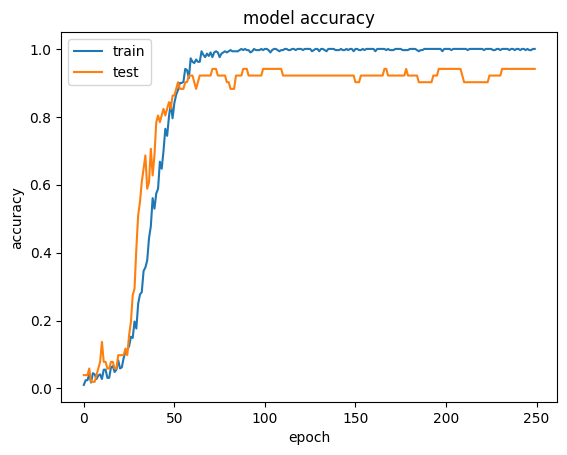

In [84]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


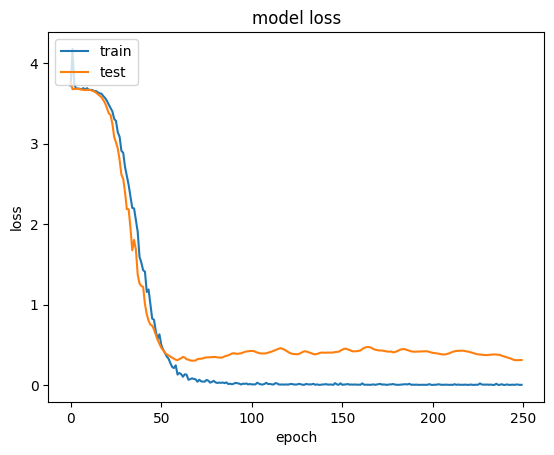

In [85]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Conclusion:
In this project i have used self designed CNN architecture and concept of distrubution training for faster traing.

As a code editor, i have used google colab.

**I have achived below accuracy score:**
* Training accuracy: 100%
* Validation accuracy: 94%
* Testing accuracy: 91.67%

It seems model is slightly overfitted but good. May be there is biased problem in the dataset. But overall model performance is good.